# Regression with Neural Networks using Tensorflow

To simplify things, regression problem are used to predict a numerical variable based on some other combination of variables (predicting a number)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


## Create, view and fit data

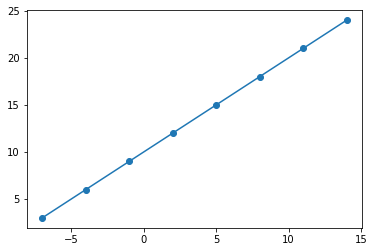

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize data

plt.plot(X,y)# this will draw a line
plt.scatter(X,y) # this will draw points in the same plot as before

## Input and Output shapes

In [3]:
#create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: id=0, shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: id=1, shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
print("number of dimension of house_info : ", house_info.ndim)
print("shape of house_info : ", house_info.shape)
print("size of house_info : ", tf.size(house_info))

number of dimension of house_info :  1
shape of house_info :  (3,)
size of house_info :  tf.Tensor(3, shape=(), dtype=int32)


In [5]:
# Turn our NumPy arrays into tensors with dtype float32
# To do that you must use the tf.cast(x,dtype=)
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: id=4, shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: id=6, shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

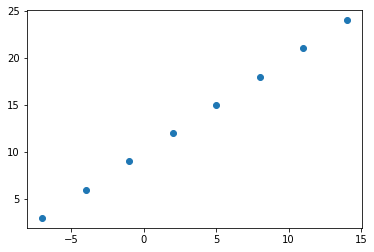

In [6]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow

* 1- **Create a model** define the input, the output layers, and the hidden layers of the model
* 2- **Compiling a model** define the loss function (= the function which tells the model how wrong it is) and the optimizer (= the function that tells the model how to improve the patterns its learning) and the evaluation metrics(=we can use it to interpret the performance of the model)
* 3- **Fitting a model** let the model find patterns btw X and y (features and labels)

In [7]:
# set a random seed
tf.random.set_seed(42)

# Create a model using the seaquential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])# output arrays of shape (*,1)

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X,y, epochs=5)

Train on 8 samples
Epoch 1/5
8/8 [==============================] - 1s 64ms/sample - loss: 11.5048 - mae: 11.5048
Epoch 2/5
8/8 [==============================] - 0s 125us/sample - loss: 11.3723 - mae: 11.3723
Epoch 3/5
8/8 [==============================] - 0s 250us/sample - loss: 11.2398 - mae: 11.2398
Epoch 4/5
8/8 [==============================] - 0s 125us/sample - loss: 11.1073 - mae: 11.1073
Epoch 5/5
8/8 [==============================] - 0s 249us/sample - loss: 10.9748 - mae: 10.9748


* The Keras sequential class helps to form a cluster of a layer that is linearly stacked into tf. keras. Model
* Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
* mae is short for mean absolute error
* sgd is short for stochasitc gradient descent


In [8]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create the model.

* 1- **creating a model** we might add mode layers, increase the number of hidden units(neurons) withing each of the hidden layers, change the activation function of each layer

* 2- **compiling a model** we might change the optimization function or perhaps the learning rate of the optimization function

* 3- **Fitting a model** we might fit a model for more epochs (train for longer) or use more data(more example to learn)

In [9]:
# let's rebuild our model

# create the model
model = tf.keras.Sequential(layers=[tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#fit the model
model.fit(X,y,epochs=100)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 0s 30ms/sample - loss: 11.2219 - mae: 11.2219
Epoch 2/100
8/8 [==============================] - 0s 250us/sample - loss: 11.0894 - mae: 11.0894
Epoch 3/100
8/8 [==============================] - 0s 249us/sample - loss: 10.9569 - mae: 10.9569
Epoch 4/100
8/8 [==============================] - 0s 249us/sample - loss: 10.8244 - mae: 10.8244
Epoch 5/100
8/8 [==============================] - 0s 124us/sample - loss: 10.6919 - mae: 10.6919
Epoch 6/100
8/8 [==============================] - 0s 313us/sample - loss: 10.5594 - mae: 10.5594
Epoch 7/100
8/8 [==============================] - 0s 249us/sample - loss: 10.4269 - mae: 10.4269
Epoch 8/100
8/8 [==============================] - 0s 249us/sample - loss: 10.2944 - mae: 10.2944
Epoch 9/100
8/8 [==============================] - 0s 249us/sample - loss: 10.1619 - mae: 10.1619
Epoch 10/100
8/8 [==============================] - 0s 128us/sample - loss: 10.0294 - mae: 10.0294
E

Epoch 86/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9656 - mae: 6.9656
Epoch 87/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9600 - mae: 6.9600
Epoch 88/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9544 - mae: 6.9544
Epoch 89/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9488 - mae: 6.9488
Epoch 90/100
8/8 [==============================] - 0s 125us/sample - loss: 6.9431 - mae: 6.9431
Epoch 91/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9375 - mae: 6.9375
Epoch 92/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9319 - mae: 6.9319
Epoch 93/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9263 - mae: 6.9263
Epoch 94/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9206 - mae: 6.9206
Epoch 95/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9150 - mae: 6.9150
Epoch 96/100
8/8 [============

In [10]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [11]:
# let's improve the model another time

# create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential(layers=[tf.keras.layers.Dense(50),tf.keras.layers.Dense(1)])

# compile the model (we modify the optimizer function with Adam optimizer with a lr 0.01)
model.compile(loss=tf.keras.losses.mae, optimizer=tf.optimizers.Adam(lr=0.01),metrics=["mae"])

# fit the model
model.fit(X,y, epochs=100)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 0s 49ms/sample - loss: 11.7682 - mae: 11.7682
Epoch 2/100
8/8 [==============================] - 0s 249us/sample - loss: 11.0963 - mae: 11.0963
Epoch 3/100
8/8 [==============================] - 0s 249us/sample - loss: 10.4150 - mae: 10.4150
Epoch 4/100
8/8 [==============================] - 0s 125us/sample - loss: 9.7212 - mae: 9.7212
Epoch 5/100
8/8 [==============================] - 0s 249us/sample - loss: 9.0104 - mae: 9.0104
Epoch 6/100
8/8 [==============================] - 0s 374us/sample - loss: 8.2778 - mae: 8.2778
Epoch 7/100
8/8 [==============================] - 0s 249us/sample - loss: 7.5198 - mae: 7.5198
Epoch 8/100
8/8 [==============================] - 0s 125us/sample - loss: 6.9648 - mae: 6.9648
Epoch 9/100
8/8 [==============================] - 0s 249us/sample - loss: 7.0672 - mae: 7.0672
Epoch 10/100
8/8 [==============================] - 0s 249us/sample - loss: 7.3315 - mae: 7.3315
Epoch 11/100
8/

Epoch 86/100
8/8 [==============================] - 0s 249us/sample - loss: 0.2124 - mae: 0.2124
Epoch 87/100
8/8 [==============================] - 0s 249us/sample - loss: 0.2288 - mae: 0.2288
Epoch 88/100
8/8 [==============================] - 0s 249us/sample - loss: 0.1901 - mae: 0.1901
Epoch 89/100
8/8 [==============================] - 0s 249us/sample - loss: 0.1354 - mae: 0.1354
Epoch 90/100
8/8 [==============================] - 0s 249us/sample - loss: 0.1218 - mae: 0.1218
Epoch 91/100
8/8 [==============================] - 0s 249us/sample - loss: 0.0382 - mae: 0.0382
Epoch 92/100
8/8 [==============================] - 0s 125us/sample - loss: 0.2197 - mae: 0.2197
Epoch 93/100
8/8 [==============================] - 0s 125us/sample - loss: 0.2189 - mae: 0.2189
Epoch 94/100
8/8 [==============================] - 0s 129us/sample - loss: 0.1427 - mae: 0.1427
Epoch 95/100
8/8 [==============================] - 0s 249us/sample - loss: 0.1168 - mae: 0.1168
Epoch 96/100
8/8 [============

In [13]:
model.predict([17.0])

array([[26.583532]], dtype=float32)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  100       
_________________________________________________________________
dense_3 (Dense)              multiple                  51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [15]:
# #C:\Program Files\Graphviz
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# #plot_model(model, show_shapes=True, show_layer_names=True)

Using TensorFlow backend.


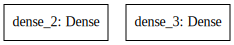

In [16]:
from IPython.display import SVG 
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# Image('model.png')

## Evaluting a model
In practice, a typical workflow you'll go through when building neural networks is:

> Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

When it comes to evaluation... there are 3 words you should memorize:
> Visualize, visualize, visualize

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [17]:
# Make a big dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: id=2866, shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [18]:
# Label for our dataset
y = X + 10
y

<tf.Tensor: id=2868, shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

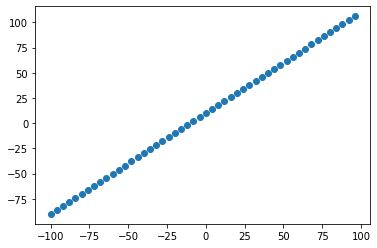

In [19]:
# Visualize the data
plt.scatter(X,y)

## The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [20]:
# check the length of data
len(X)

50

In [21]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

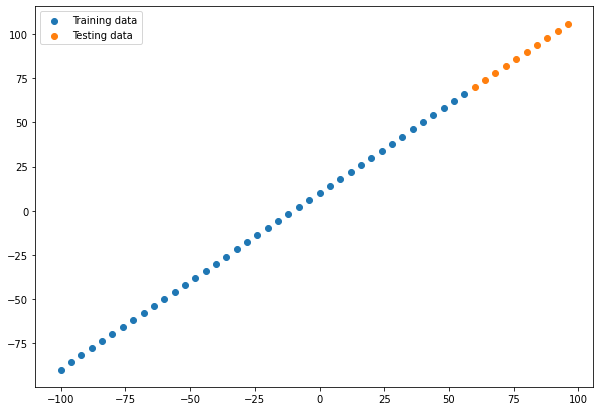

In [22]:
# visualize training data and testing data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, label="Training data")
plt.scatter(X_test, y_test, label="Testing data")
plt.legend()


In [54]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),#.SGD()
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

In [48]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [55]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

In [57]:
model.fit(X_train,y_train,epochs=200, )#verbose=0 to not display the output

Train on 40 samples
Epoch 1/200
40/40 [==============================] - 0s 6ms/sample - loss: 27.8137 - mae: 27.8137
Epoch 2/200
40/40 [==============================] - 0s 83us/sample - loss: 25.8345 - mae: 25.8345
Epoch 3/200
40/40 [==============================] - 0s 100us/sample - loss: 20.4511 - mae: 20.4511
Epoch 4/200
40/40 [==============================] - 0s 103us/sample - loss: 13.3376 - mae: 13.3376
Epoch 5/200
40/40 [==============================] - 0s 100us/sample - loss: 18.2829 - mae: 18.2829
Epoch 6/200
40/40 [==============================] - 0s 100us/sample - loss: 18.1217 - mae: 18.1217
Epoch 7/200
40/40 [==============================] - 0s 75us/sample - loss: 12.7809 - mae: 12.7809
Epoch 8/200
40/40 [==============================] - 0s 75us/sample - loss: 12.1511 - mae: 12.1511
Epoch 9/200
40/40 [==============================] - 0s 100us/sample - loss: 11.1948 - mae: 11.1948
Epoch 10/200
40/40 [==============================] - 0s 125us/sample - loss: 10.5904

40/40 [==============================] - 0s 75us/sample - loss: 11.3908 - mae: 11.3908
Epoch 83/200
40/40 [==============================] - 0s 100us/sample - loss: 17.1825 - mae: 17.1825
Epoch 84/200
40/40 [==============================] - 0s 75us/sample - loss: 10.3409 - mae: 10.3409
Epoch 85/200
40/40 [==============================] - 0s 100us/sample - loss: 21.6712 - mae: 21.6712
Epoch 86/200
40/40 [==============================] - 0s 75us/sample - loss: 11.9182 - mae: 11.9182
Epoch 87/200
40/40 [==============================] - 0s 100us/sample - loss: 8.8366 - mae: 8.8366
Epoch 88/200
40/40 [==============================] - 0s 74us/sample - loss: 9.9050 - mae: 9.9050
Epoch 89/200
40/40 [==============================] - 0s 100us/sample - loss: 19.0907 - mae: 19.0907
Epoch 90/200
40/40 [==============================] - 0s 100us/sample - loss: 19.6125 - mae: 19.6125
Epoch 91/200
40/40 [==============================] - 0s 75us/sample - loss: 10.2435 - mae: 10.2435
Epoch 92/200

40/40 [==============================] - 0s 125us/sample - loss: 33.1449 - mae: 33.1449
Epoch 164/200
40/40 [==============================] - 0s 100us/sample - loss: 25.0927 - mae: 25.0927
Epoch 165/200
40/40 [==============================] - 0s 100us/sample - loss: 10.6626 - mae: 10.6626
Epoch 166/200
40/40 [==============================] - 0s 125us/sample - loss: 13.9357 - mae: 13.9357
Epoch 167/200
40/40 [==============================] - 0s 125us/sample - loss: 19.5668 - mae: 19.5668
Epoch 168/200
40/40 [==============================] - 0s 125us/sample - loss: 13.3174 - mae: 13.3174
Epoch 169/200
40/40 [==============================] - 0s 125us/sample - loss: 17.9487 - mae: 17.9487
Epoch 170/200
40/40 [==============================] - 0s 100us/sample - loss: 18.1582 - mae: 18.1582
Epoch 171/200
40/40 [==============================] - 0s 125us/sample - loss: 11.6374 - mae: 11.6374
Epoch 172/200
40/40 [==============================] - 0s 150us/sample - loss: 17.2660 - mae: 17

In [58]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


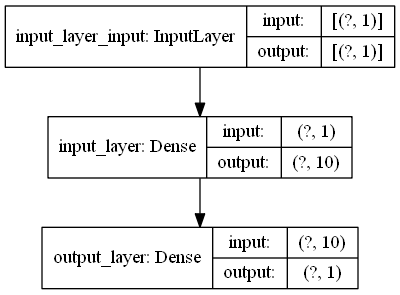

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions¶
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [60]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([[ 64.51161 ],
       [ 68.60118 ],
       [ 72.69074 ],
       [ 76.780304],
       [ 80.86987 ],
       [ 84.959435],
       [ 89.049   ],
       [ 93.13857 ],
       [ 97.22813 ],
       [101.317696]], dtype=float32)

In [31]:
y_test

<tf.Tensor: id=2908, shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [36]:

# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

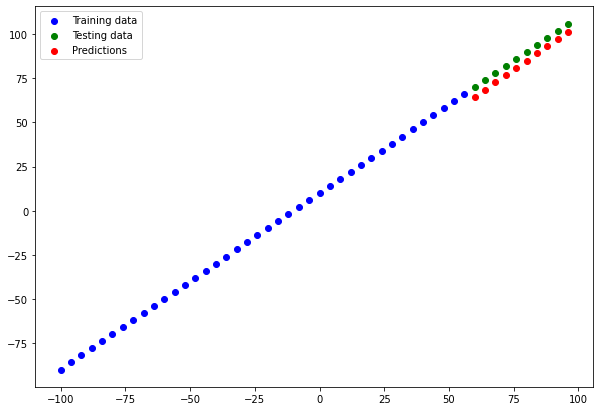

In [61]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [62]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample - loss: 5.0853 - mae: 5.0853


[5.085345268249512, 5.0853453]

In [64]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: id=15153, shape=(10,), dtype=float32, numpy=
array([23.488388, 19.398819, 15.847406, 13.131818, 11.25205 , 10.208113,
       10.      , 10.627714, 12.09125 , 14.390619], dtype=float32)>

In [74]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred = tf.squeeze(y_pred))

**Note** You can notice the important of squeeze below

In [72]:
a = tf.constant(value=[1,3,4,5], shape=(1,4))
a

<tf.Tensor: id=15169, shape=(1, 4), dtype=int32, numpy=array([[1, 3, 4, 5]])>

In [73]:
tf.squeeze(a)

<tf.Tensor: id=15170, shape=(4,), dtype=int32, numpy=array([1, 3, 4, 5])>

## Running experiments to improve our model¶

>Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...

* 1- Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
* 2- Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* 3-Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

* model_1 - same as the original model, 1 layer, trained for 100 epochs
* model_2 - 2 layers, trained for 100 epochs
* model_3 - 2 layers, trained for 500 epochs

**model_1**

In [77]:
X_train, y_train

(<tf.Tensor: id=2896, shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: id=2900, shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [75]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(layers=[tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

model_1.fit(X_train,y_train,epochs=100)

Train on 40 samples
Epoch 1/100
40/40 [==============================] - 0s 6ms/sample - loss: 15.7535 - mae: 15.7535
Epoch 2/100
40/40 [==============================] - 0s 74us/sample - loss: 11.2830 - mae: 11.2830
Epoch 3/100
40/40 [==============================] - 0s 75us/sample - loss: 9.3153 - mae: 9.3153
Epoch 4/100
40/40 [==============================] - 0s 75us/sample - loss: 10.5375 - mae: 10.5375
Epoch 5/100
40/40 [==============================] - 0s 75us/sample - loss: 12.9586 - mae: 12.9586
Epoch 6/100
40/40 [==============================] - 0s 119us/sample - loss: 10.6511 - mae: 10.6511
Epoch 7/100
40/40 [==============================] - 0s 108us/sample - loss: 16.6176 - mae: 16.6176
Epoch 8/100
40/40 [==============================] - 0s 75us/sample - loss: 8.4914 - mae: 8.4914
Epoch 9/100
40/40 [==============================] - 0s 74us/sample - loss: 10.1877 - mae: 10.1877
Epoch 10/100
40/40 [==============================] - 0s 104us/sample - loss: 8.8407 - mae: 

40/40 [==============================] - 0s 100us/sample - loss: 8.5710 - mae: 8.5710
Epoch 84/100
40/40 [==============================] - 0s 74us/sample - loss: 8.9407 - mae: 8.9406
Epoch 85/100
40/40 [==============================] - 0s 100us/sample - loss: 9.6096 - mae: 9.6096
Epoch 86/100
40/40 [==============================] - 0s 75us/sample - loss: 7.8301 - mae: 7.8300
Epoch 87/100
40/40 [==============================] - 0s 100us/sample - loss: 8.1016 - mae: 8.1016
Epoch 88/100
40/40 [==============================] - 0s 75us/sample - loss: 8.9290 - mae: 8.9290
Epoch 89/100
40/40 [==============================] - 0s 74us/sample - loss: 10.3717 - mae: 10.3717
Epoch 90/100
40/40 [==============================] - 0s 75us/sample - loss: 10.8113 - mae: 10.8113
Epoch 91/100
40/40 [==============================] - 0s 99us/sample - loss: 14.7285 - mae: 14.7285
Epoch 92/100
40/40 [==============================] - 0s 80us/sample - loss: 9.7984 - mae: 9.7984
Epoch 93/100
40/40 [====

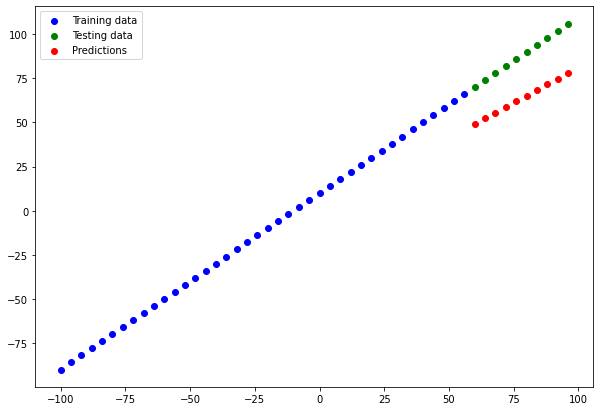

In [78]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [79]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_true=y_test,y_pred=y_preds_1)
mse_1 = mse(y_true=y_test,y_pred=y_preds_1)
mae_1,mse_1

(<tf.Tensor: id=16574, shape=(), dtype=float32, numpy=24.425938>,
 <tf.Tensor: id=16580, shape=(), dtype=float32, numpy=602.03613>)

**model_2**
* 2 dense layers, trained 100 epochs

In [80]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Train on 40 samples
Epoch 1/100
40/40 [==============================] - 0s 6ms/sample - loss: 27.8137 - mse: 1099.3820
Epoch 2/100
40/40 [==============================] - 0s 105us/sample - loss: 25.8345 - mse: 958.9375
Epoch 3/100
40/40 [==============================] - 0s 99us/sample - loss: 20.4511 - mse: 603.8470
Epoch 4/100
40/40 [==============================] - 0s 125us/sample - loss: 13.3376 - mse: 261.6294
Epoch 5/100
40/40 [==============================] - 0s 100us/sample - loss: 18.2829 - mse: 476.6585
Epoch 6/100
40/40 [==============================] - 0s 125us/sample - loss: 18.1217 - mse: 488.6873
Epoch 7/100
40/40 [==============================] - 0s 76us/sample - loss: 12.7809 - mse: 210.6333
Epoch 8/100
40/40 [==============================] - 0s 75us/sample - loss: 12.1511 - mse: 175.0770
Epoch 9/100
40/40 [==============================] - 0s 101us/sample - loss: 11.1948 - mse: 165.3558
Epoch 10/100
40/40 [==============================] - 0s 100us/sample - los

40/40 [==============================] - 0s 100us/sample - loss: 17.4219 - mse: 449.3495
Epoch 82/100
40/40 [==============================] - 0s 75us/sample - loss: 11.3908 - mse: 163.0587
Epoch 83/100
40/40 [==============================] - 0s 75us/sample - loss: 17.1825 - mse: 465.8315
Epoch 84/100
40/40 [==============================] - 0s 75us/sample - loss: 10.3409 - mse: 182.3101
Epoch 85/100
40/40 [==============================] - 0s 100us/sample - loss: 21.6712 - mse: 668.0697
Epoch 86/100
40/40 [==============================] - 0s 100us/sample - loss: 11.9182 - mse: 205.5722
Epoch 87/100
40/40 [==============================] - 0s 100us/sample - loss: 8.8366 - mse: 98.1270
Epoch 88/100
40/40 [==============================] - 0s 100us/sample - loss: 9.9050 - mse: 114.6939
Epoch 89/100
40/40 [==============================] - 0s 125us/sample - loss: 19.0907 - mse: 511.2997
Epoch 90/100
40/40 [==============================] - 0s 100us/sample - loss: 19.6125 - mse: 542.8571

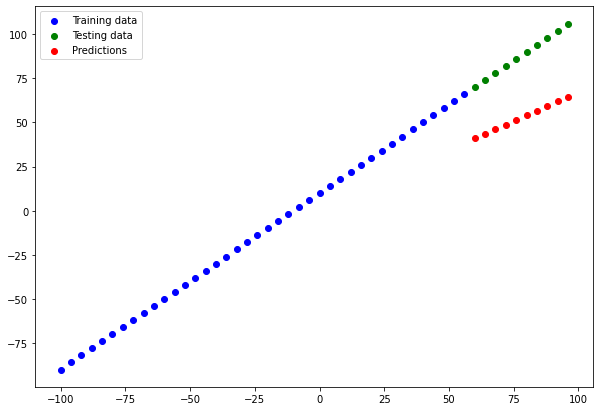

In [81]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [82]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: id=18042, shape=(), dtype=float32, numpy=35.3072>,
 <tf.Tensor: id=18048, shape=(), dtype=float32, numpy=1262.276>)

**model_3**
* 2 layers, trained for 500 epochs

In [83]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Train on 40 samples
Epoch 1/500
40/40 [==============================] - 0s 6ms/sample - loss: 27.8137 - mae: 27.8137
Epoch 2/500
40/40 [==============================] - 0s 99us/sample - loss: 25.8345 - mae: 25.8345
Epoch 3/500
40/40 [==============================] - 0s 125us/sample - loss: 20.4511 - mae: 20.4511
Epoch 4/500
40/40 [==============================] - 0s 74us/sample - loss: 13.3376 - mae: 13.3376
Epoch 5/500
40/40 [==============================] - 0s 100us/sample - loss: 18.2829 - mae: 18.2829
Epoch 6/500
40/40 [==============================] - 0s 99us/sample - loss: 18.1217 - mae: 18.1217
Epoch 7/500
40/40 [==============================] - 0s 75us/sample - loss: 12.7809 - mae: 12.7809
Epoch 8/500
40/40 [==============================] - 0s 75us/sample - loss: 12.1511 - mae: 12.1511
Epoch 9/500
40/40 [==============================] - 0s 124us/sample - loss: 11.1948 - mae: 11.1948
Epoch 10/500
40/40 [==============================] - 0s 100us/sample - loss: 10.5904 -

40/40 [==============================] - 0s 75us/sample - loss: 11.3908 - mae: 11.3908
Epoch 83/500
40/40 [==============================] - 0s 100us/sample - loss: 17.1825 - mae: 17.1825
Epoch 84/500
40/40 [==============================] - 0s 75us/sample - loss: 10.3409 - mae: 10.3409
Epoch 85/500
40/40 [==============================] - 0s 100us/sample - loss: 21.6712 - mae: 21.6712
Epoch 86/500
40/40 [==============================] - 0s 75us/sample - loss: 11.9182 - mae: 11.9182
Epoch 87/500
40/40 [==============================] - 0s 75us/sample - loss: 8.8366 - mae: 8.8366
Epoch 88/500
40/40 [==============================] - 0s 75us/sample - loss: 9.9050 - mae: 9.9050
Epoch 89/500
40/40 [==============================] - 0s 75us/sample - loss: 19.0907 - mae: 19.0907
Epoch 90/500
40/40 [==============================] - 0s 75us/sample - loss: 19.6125 - mae: 19.6125
Epoch 91/500
40/40 [==============================] - 0s 75us/sample - loss: 10.2435 - mae: 10.2435
Epoch 92/500
40

40/40 [==============================] - 0s 99us/sample - loss: 33.1449 - mae: 33.1449
Epoch 164/500
40/40 [==============================] - 0s 100us/sample - loss: 25.0927 - mae: 25.0927
Epoch 165/500
40/40 [==============================] - 0s 150us/sample - loss: 10.6626 - mae: 10.6626
Epoch 166/500
40/40 [==============================] - 0s 100us/sample - loss: 13.9357 - mae: 13.9357
Epoch 167/500
40/40 [==============================] - 0s 100us/sample - loss: 19.5668 - mae: 19.5668
Epoch 168/500
40/40 [==============================] - 0s 150us/sample - loss: 13.3174 - mae: 13.3174
Epoch 169/500
40/40 [==============================] - 0s 100us/sample - loss: 17.9487 - mae: 17.9487
Epoch 170/500
40/40 [==============================] - 0s 100us/sample - loss: 18.1582 - mae: 18.1582
Epoch 171/500
40/40 [==============================] - 0s 125us/sample - loss: 11.6374 - mae: 11.6374
Epoch 172/500
40/40 [==============================] - 0s 150us/sample - loss: 17.2660 - mae: 17.

40/40 [==============================] - 0s 75us/sample - loss: 13.9393 - mae: 13.9393
Epoch 244/500
40/40 [==============================] - 0s 75us/sample - loss: 16.9439 - mae: 16.9439
Epoch 245/500
40/40 [==============================] - 0s 100us/sample - loss: 16.0155 - mae: 16.0155
Epoch 246/500
40/40 [==============================] - 0s 75us/sample - loss: 21.1541 - mae: 21.1541
Epoch 247/500
40/40 [==============================] - 0s 75us/sample - loss: 28.7331 - mae: 28.7331
Epoch 248/500
40/40 [==============================] - 0s 75us/sample - loss: 12.1718 - mae: 12.1718
Epoch 249/500
40/40 [==============================] - 0s 100us/sample - loss: 24.7733 - mae: 24.7733
Epoch 250/500
40/40 [==============================] - 0s 75us/sample - loss: 16.4869 - mae: 16.4869
Epoch 251/500
40/40 [==============================] - 0s 75us/sample - loss: 11.8100 - mae: 11.8099
Epoch 252/500
40/40 [==============================] - 0s 100us/sample - loss: 11.6724 - mae: 11.6724
E

40/40 [==============================] - 0s 100us/sample - loss: 19.1332 - mae: 19.1332
Epoch 325/500
40/40 [==============================] - 0s 100us/sample - loss: 17.3112 - mae: 17.3112
Epoch 326/500
40/40 [==============================] - 0s 125us/sample - loss: 12.8367 - mae: 12.8367
Epoch 327/500
40/40 [==============================] - 0s 100us/sample - loss: 12.8139 - mae: 12.8139
Epoch 328/500
40/40 [==============================] - 0s 100us/sample - loss: 6.7461 - mae: 6.7461
Epoch 329/500
40/40 [==============================] - 0s 125us/sample - loss: 13.7843 - mae: 13.7843
Epoch 330/500
40/40 [==============================] - 0s 100us/sample - loss: 13.1272 - mae: 13.1272
Epoch 331/500
40/40 [==============================] - 0s 100us/sample - loss: 23.9490 - mae: 23.9490
Epoch 332/500
40/40 [==============================] - 0s 75us/sample - loss: 15.9071 - mae: 15.9071
Epoch 333/500
40/40 [==============================] - 0s 150us/sample - loss: 12.7800 - mae: 12.78

40/40 [==============================] - 0s 75us/sample - loss: 18.3730 - mae: 18.3730
Epoch 406/500
40/40 [==============================] - 0s 101us/sample - loss: 12.9136 - mae: 12.9136
Epoch 407/500
40/40 [==============================] - 0s 100us/sample - loss: 13.5167 - mae: 13.5167
Epoch 408/500
40/40 [==============================] - 0s 75us/sample - loss: 33.0462 - mae: 33.0462
Epoch 409/500
40/40 [==============================] - 0s 75us/sample - loss: 13.8040 - mae: 13.8040
Epoch 410/500
40/40 [==============================] - 0s 75us/sample - loss: 19.3745 - mae: 19.3745
Epoch 411/500
40/40 [==============================] - 0s 75us/sample - loss: 18.8776 - mae: 18.8776
Epoch 412/500
40/40 [==============================] - 0s 100us/sample - loss: 28.9697 - mae: 28.9697
Epoch 413/500
40/40 [==============================] - 0s 100us/sample - loss: 26.9331 - mae: 26.9331
Epoch 414/500
40/40 [==============================] - 0s 99us/sample - loss: 11.4825 - mae: 11.4825


40/40 [==============================] - 0s 101us/sample - loss: 15.4415 - mae: 15.4415
Epoch 487/500
40/40 [==============================] - 0s 99us/sample - loss: 24.4053 - mae: 24.4053
Epoch 488/500
40/40 [==============================] - 0s 100us/sample - loss: 22.0885 - mae: 22.0885
Epoch 489/500
40/40 [==============================] - 0s 100us/sample - loss: 8.8916 - mae: 8.8916
Epoch 490/500
40/40 [==============================] - 0s 75us/sample - loss: 6.0520 - mae: 6.0520
Epoch 491/500
40/40 [==============================] - 0s 75us/sample - loss: 28.2751 - mae: 28.2751
Epoch 492/500
40/40 [==============================] - 0s 76us/sample - loss: 17.6187 - mae: 17.6187
Epoch 493/500
40/40 [==============================] - 0s 99us/sample - loss: 6.3116 - mae: 6.3116
Epoch 494/500
40/40 [==============================] - 0s 100us/sample - loss: 22.9460 - mae: 22.9460
Epoch 495/500
40/40 [==============================] - 0s 74us/sample - loss: 13.9155 - mae: 13.9155
Epoch 

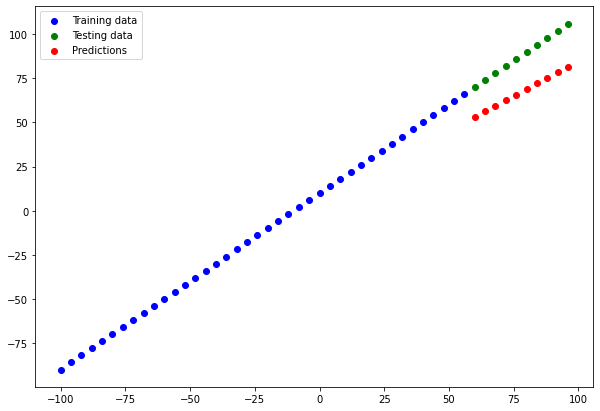

In [84]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [85]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: id=22713, shape=(), dtype=float32, numpy=20.635275>,
 <tf.Tensor: id=22719, shape=(), dtype=float32, numpy=431.73477>)